In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Base Test**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# We will be using our own UBL share price data from google drive.
df = pd.read_csv('/content/drive/MyDrive/psxdata/stocks/UBL.csv')
df.head()

,ds,y
0,2013/01/01,83.24
1,2013/01/02,81.24
2,2013/01/03,81.81
3,2013/01/04,82.52
4,2013/01/07,82.69


In [ ]:
# Extract the date and closing price columns
ds = df['ds']
y = df['y']

# Calculate the number of data points for training and testing
number_of_data_points = len(df)
train_data_size = math.ceil(number_of_data_points * 0.8)

# Split the data into training and testing sets
df_train = pd.DataFrame(data={'ds': ds[:train_data_size], 'y': y[:train_data_size]})
df_test = pd.DataFrame(data={'ds': ds[train_data_size:], 'y': y[train_data_size:]})

In [ ]:
#Holidays
New_Years_Eve = pd.DataFrame({
    'holiday': 'New Years Eve',
    'ds': pd.to_datetime(['2013-12-31', '2014-12-31','2015-12-31','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31', '2022-12-31',]),
    'lower_window': 0,
    'upper_window': 1,
})

Bank_Holiday = pd.DataFrame({
    'holiday': 'Bank Holiday',
    'ds': pd.to_datetime(['2013-07-01', '2014-07-01','2015-07-01','2016-07-01','2017-07-01','2018-07-01','2019-07-01','2020-07-01','2021-07-01', '2022-07-01',]),
    'lower_window': 0,
    'upper_window': 0,
})

Defence_Day = pd.DataFrame({
    'holiday': 'Defence Day',
    'ds': pd.to_datetime(['2013-09-01', '2014-09-01','2015-09-01','2016-09-01','2017-09-01','2018-09-01','2019-09-01','2020-09-01','2021-09-01', '2022-09-01',]),
    'lower_window': 0,
    'upper_window': 0,
})

# Concatenate the DataFrames into a single DataFrame
holidays = pd.concat((New_Years_Eve, Bank_Holiday, Defence_Day))

In [ ]:
# Instantiate prophet
#m = Prophet()
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='PAK')

# fit the training data
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_0fbdce/tlxwxgvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_0fbdce/uakp62m7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50166', 'data', 'file=/tmp/tmp7_0fbdce/tlxwxgvq.json', 'init=/tmp/tmp7_0fbdce/uakp62m7.json', 'output', 'file=/tmp/tmp7_0fbdce/prophet_model1eppo48_/prophet_model-20240601175832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:58:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(df_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
490,2022-12-26,83.009895,-8.084299,181.159118
491,2022-12-27,83.282663,-9.925120,180.075259
492,2022-12-28,83.566443,-8.105206,181.936893
493,2022-12-29,84.079201,-6.244697,182.441441
494,2022-12-30,84.457043,-10.914751,183.418490


In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [ ]:
# Evaluation Metric
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'])))

# **Mass Deploy**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv187tnf0/gkv9gqp8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv187tnf0/0sfk_ie3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24265', 'data', 'file=/tmp/tmpv187tnf0/gkv9gqp8.json', 'init=/tmp/tmpv187tnf0/0sfk_ie3.json', 'output', 'file=/tmp/tmpv187tnf0/prophet_modelj5x_b1jn/prophet_model-20240519174317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1

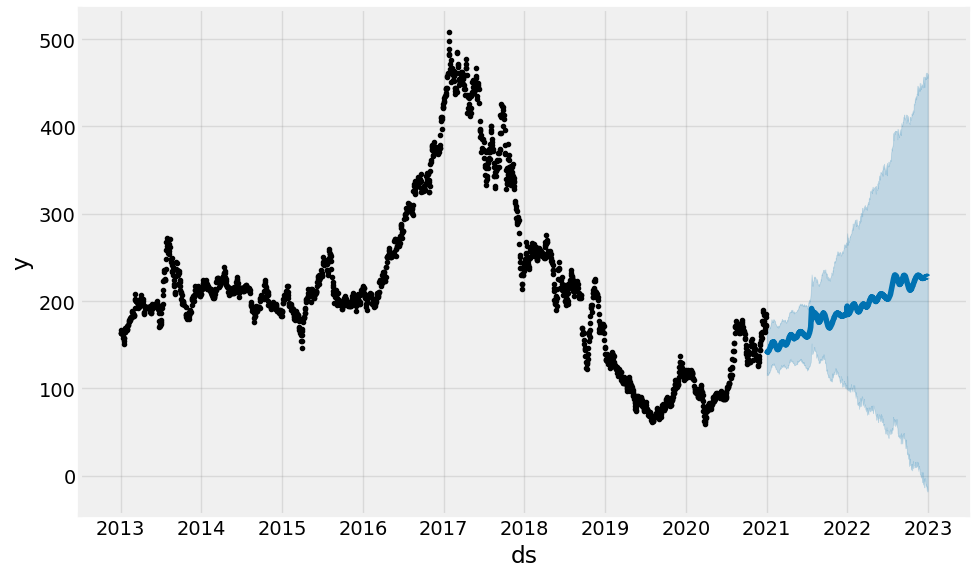

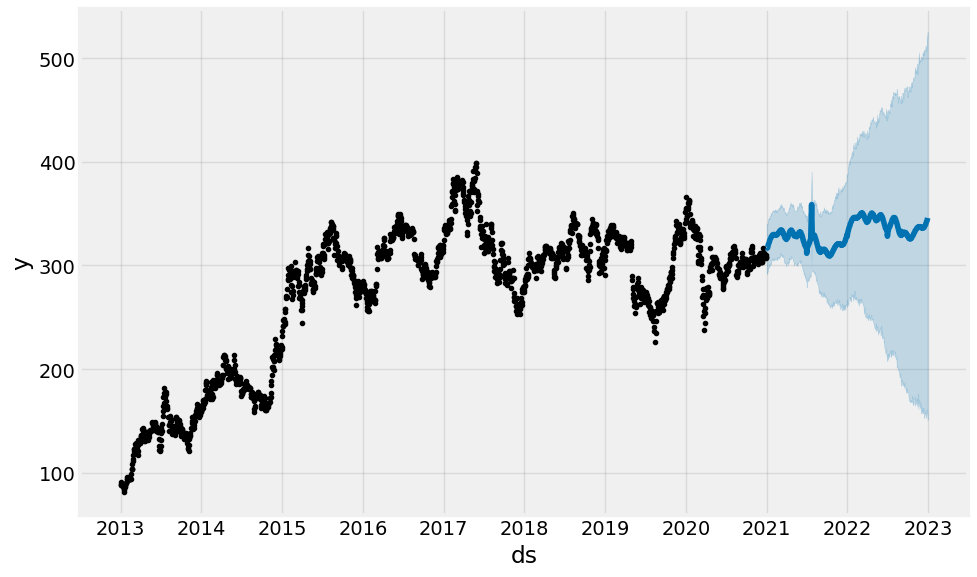

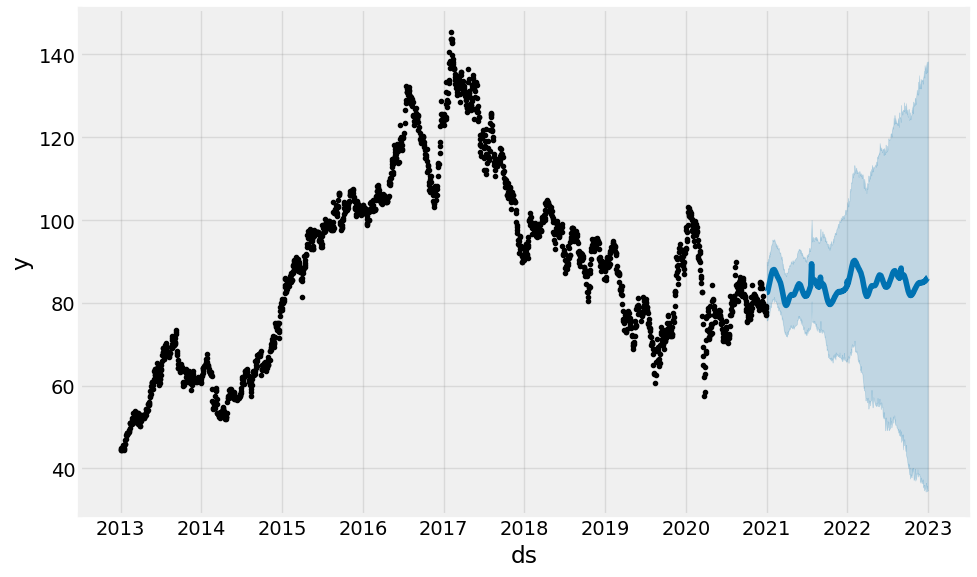

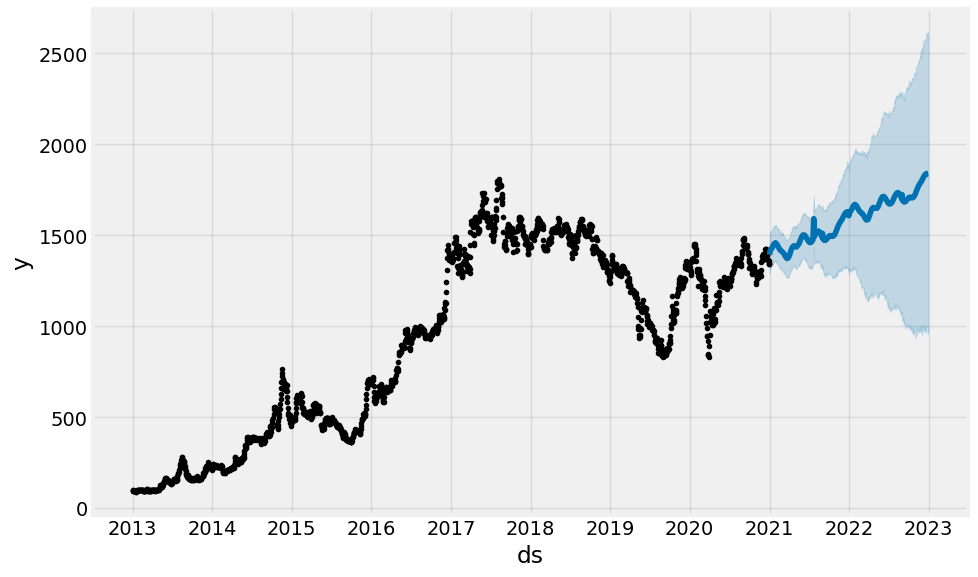

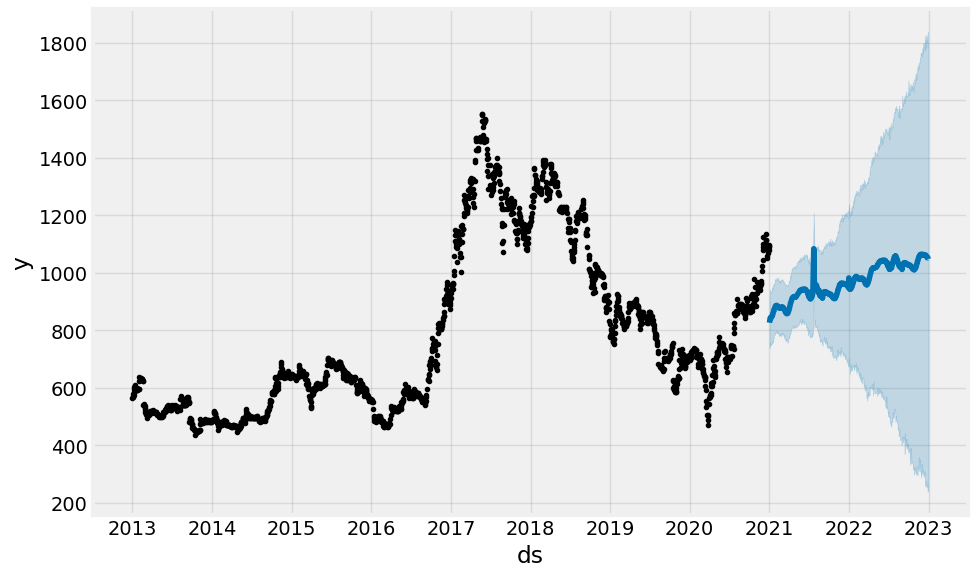

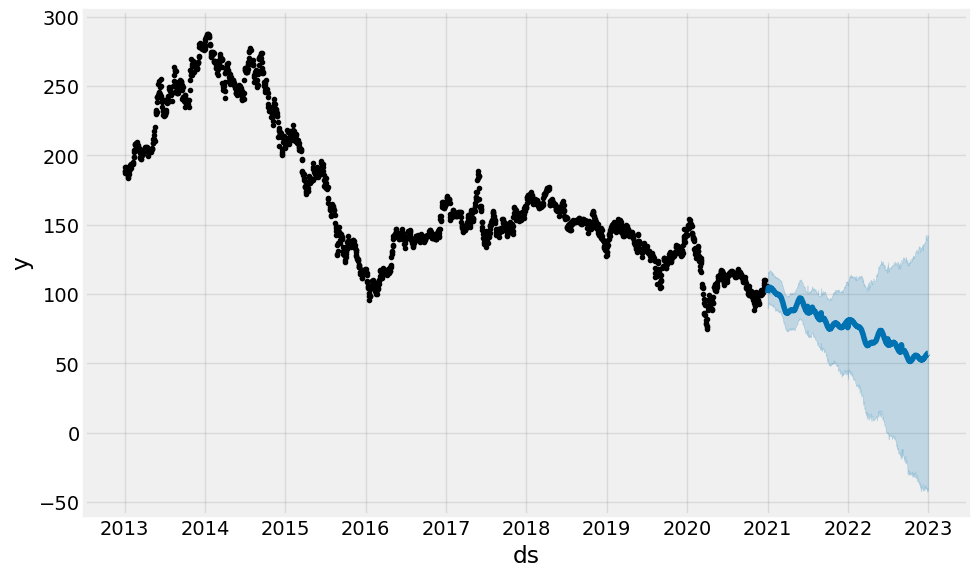

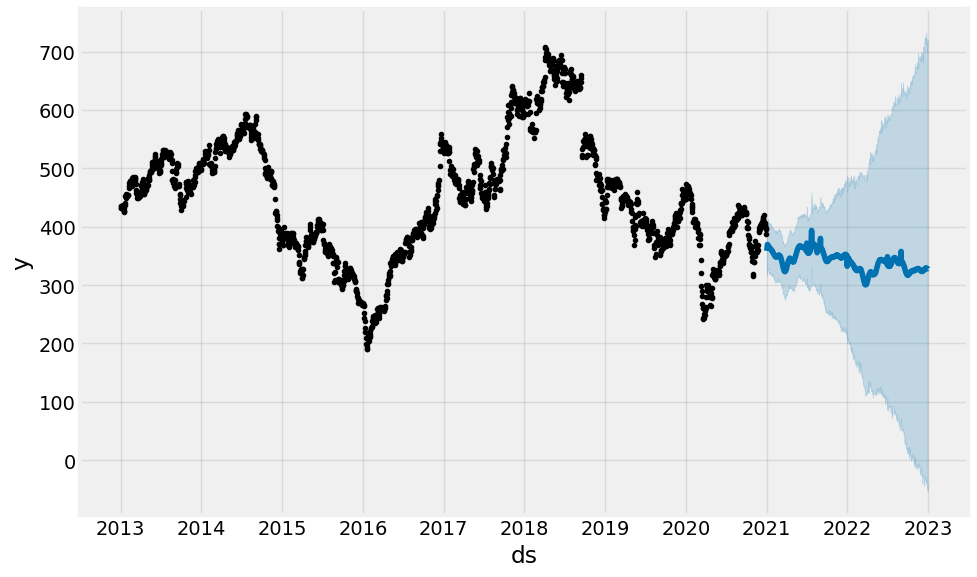

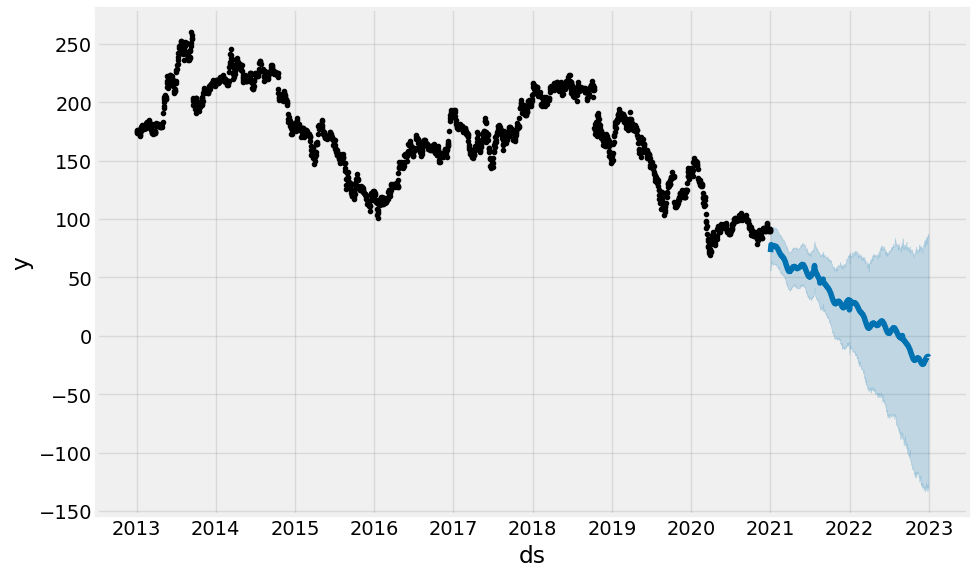

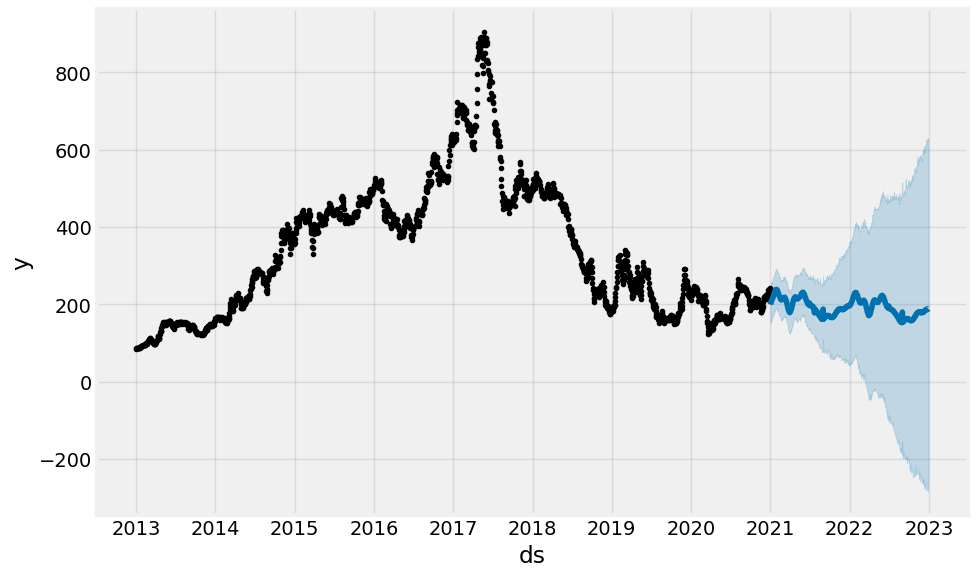

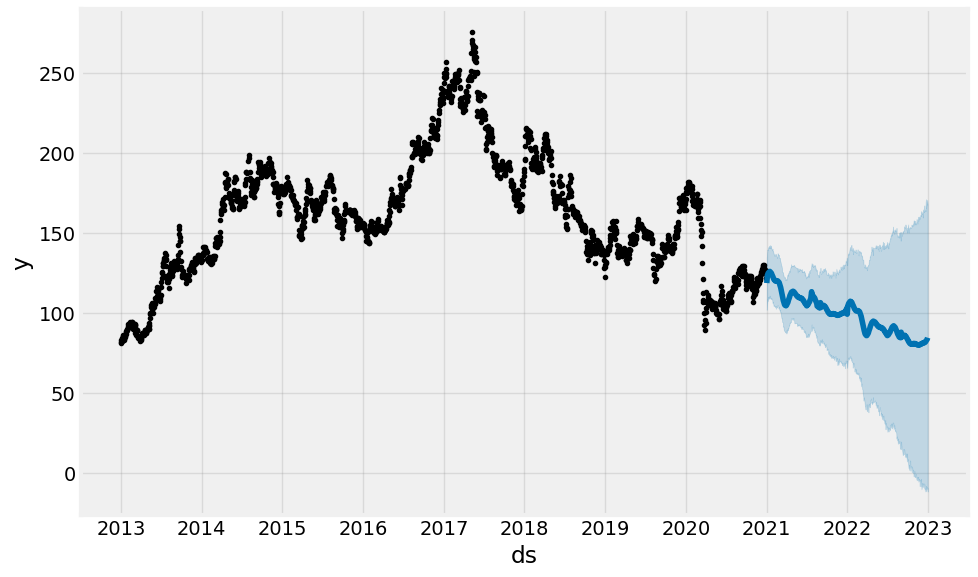

In [ ]:
# A script of that takes the Base Test cell code and makes it so it auto runs it for each of the 10 stocks.  I also want you to add code that saves the training, testing, and forecasted data in .csv files for each of the 10 stocks. I also want you to at the end of it all, make and save a .csv table consisting of the MAE, MSE, RMSE values of all the stocks.

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

stocks = ["ATRL.csv", "ENGRO.csv", "HUBC.csv", "MARI.csv", "MTL.csv", "OGDC.csv", "POL.csv", "PPL.csv", "PSMC.csv", "UBL.csv"]

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Stock', 'MAE', 'MSE', 'RMSE'])

for stock in stocks:
  # Read the data from the CSV file
  df = pd.read_csv(f'/content/drive/MyDrive/psxdata/stocks/' + stock)

  # Extract the date and closing price columns
  ds = df['ds']
  y = df['y']

  # Calculate the number of data points for training and testing
  number_of_data_points = len(df)
  train_data_size = math.ceil(number_of_data_points * 0.8)

  # Split the data into training and testing sets
  df_train = pd.DataFrame(data={'ds': ds[:train_data_size], 'y': y[:train_data_size]})
  df_test = pd.DataFrame(data={'ds': ds[train_data_size:], 'y': y[train_data_size:]})

  # Define the holidays
  New_Years_Eve = pd.DataFrame({
      'holiday': 'New Years Eve',
      'ds': pd.to_datetime(['2013-12-31', '2014-12-31','2015-12-31','2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31', '2022-12-31',]),
      'lower_window': 0,
      'upper_window': 1,
  })

  Bank_Holiday = pd.DataFrame({
      'holiday': 'Bank Holiday',
      'ds': pd.to_datetime(['2013-07-01', '2014-07-01','2015-07-01','2016-07-01','2017-07-01','2018-07-01','2019-07-01','2020-07-01','2021-07-01', '2022-07-01',]),
      'lower_window': 0,
      'upper_window': 0,
  })

  Defence_Day = pd.DataFrame({
      'holiday': 'Defence Day',
      'ds': pd.to_datetime(['2013-09-01', '2014-09-01','2015-09-01','2016-09-01','2017-09-01','2018-09-01','2019-09-01','2020-09-01','2021-09-01', '2022-09-01',]),
      'lower_window': 0,
      'upper_window': 0,
  })

  # Concatenate the DataFrames into a single DataFrame
  holidays = pd.concat((New_Years_Eve, Bank_Holiday, Defence_Day))

  # Instantiate Prophet
  m = Prophet(holidays=holidays)
  m.add_country_holidays(country_name='PAK')

  # Fit the training data
  m.fit(df_train)

  # Make the forecast
  forecast = m.predict(df_test)

  # Plot the forecast
  fig1 = m.plot(forecast)
  fig1.savefig('/content/drive/MyDrive/psxdata/prophet/figures/' + stock + '_prophet.png', format='png')

  # Save the training, testing, and forecasted data to CSV files
  df_train.to_csv('/content/drive/MyDrive/psxdata/prophet/train/' + stock + '_train.csv')
  df_test.to_csv('/content/drive/MyDrive/psxdata/prophet/test/' + stock + '_test.csv')
  forecast.to_csv('/content/drive/MyDrive/psxdata/prophet/processed/' + stock + '_forecast.csv')

  # Calculate the evaluation metrics
  mae = mean_absolute_error(y_true=df_test["y"], y_pred=forecast['yhat'])
  mse = mean_squared_error(y_true=df_test["y"], y_pred=forecast['yhat'])
  rmse = np.sqrt(mse)

  # Add the metrics to the DataFrame
  metrics_df = pd.concat([metrics_df, pd.DataFrame({'Stock': stock, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}, index=[0])], ignore_index=True)

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv('/content/drive/MyDrive/psxdata/prophet/metrics.csv')
